In [1]:
import numpy as np
import open3d as o3d
import pathlib
import re
from ipywidgets import interact
from lib.datasets.kitti_utils import Calibration
import cv2

%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [68]:
from pathlib import Path
from tools.sample_util import SampleDatabase
from tools.dataset_util import Dataset
test_dir = Path("/mnt/e/DataSet/kitti/kitti_img_database/test")
np.random.seed(0)

idx = 4

database = SampleDatabase("/mnt/e/DataSet/kitti/kitti_img_database/")
dataset = Dataset("train", r"/mnt/e/DataSet/kitti")

calib_ = dataset.get_calib(idx)
image, depth = dataset.get_image_with_depth(idx, use_penet=True)
ground, non_ground = dataset.get_lidar_with_ground(idx, fov=True)
plane_ = dataset.get_plane(idx)
samples = database.get_samples(ground, non_ground, calib_, plane_)

In [69]:
image_, depth_, samples = database.add_samples_to_scene(samples, image, depth, use_edge_blur=True)

In [70]:
from tools.visualize_util import plt_show
cv2.imwrite("0.png", image_)

True

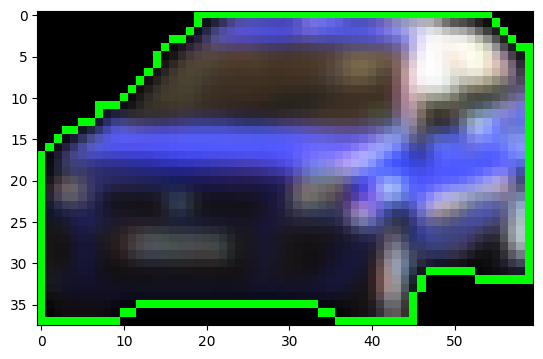

In [24]:
i = image_.copy()
cv2.drawContours(i, contours, -1, (0, 255, 0), 1)
plt_show(i)